# Imports

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [9]:
model = HANKModelClass(name='baseline')

In [10]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [11]:
model.find_ss(do_print = True)

0.9999999999999964
0.9999999999999125
0.9999999999999963
0.9999999999999915
0.9999999999999932
0.9999999999999925
0.9999999999999911
0.9999999999999911
0.9999999999999922
0.9999999999999927
0.9999999999999922
steady state found in 5.7 secs
 r    =   0.0050
 q    =   4.8789
 qB   =   1.0000
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [12]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
B              : t0 =  0.0e+00, max abs.  0.0e+00
chi            : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -4.5e-11, max abs.  2.2e-10
clearing_Y     : t0 =  3.4e-14, max abs.  1.5e-11
G              : t0 =  0.0e+00, max abs.  0.0e+00
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
pi_w           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
q              : t0 = -8.9e-16, max abs.  8.9e-16
r              : t0 =  0.0e+00, max abs.  0.0e+00
ra             : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0 =  3.4e-14, max abs.  2.7e-10
C_hh           : t0

In [13]:
model.compute_jacs()

In [14]:
model.find_transition_path(do_print = True)

finding the transition path:
 it =   0 -> max. abs. error = 1.00e-02
   3.76e-12 in NKWC_res
   1.00e-02 in clearing_A
   2.00e-03 in clearing_Y
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   1 -> max. abs. error = 5.46e+01
   1.30e+00 in NKWC_res
   5.46e+01 in clearing_A
   3.65e+00 in clearing_Y
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   2 -> max. abs. error = 2.74e+03
   2.30e+01 in NKWC_res
   2.39e+03 in clearing_A
   2.74e+03 in clearing_Y
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   3 -> max. abs. error = 1.57e+03
   1.55e+02 in NKWC_res
   1.57e+03 in clearing_A
   9.06e+01 in clearing_Y
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   4 -

KeyboardInterrupt: 

In [ ]:
paths = ['i','pi','r']
lvl_value = ['i','pi','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

# Test Household Problem

In [4]:
# just some ad hoc parameters
par.beta = 0.96**(1/4)
ss.ra = 1.02**(1/4)-1
ss.w = 1.0
ss.L = 1.0
ss.tau = 0.10
ss.chi = 0.0

In [ ]:
model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 3.5 secs [1007 iterations]


In [6]:
ss.D

array([[[6.60530157e-03, 7.45311218e-05, 7.11937697e-05, ...,
         1.12982367e-10, 3.00706232e-11, 3.06713209e-12],
        [2.67951012e-02, 4.96574466e-04, 4.35693708e-04, ...,
         6.84357348e-09, 2.48206884e-09, 4.22287329e-10],
        [2.92118225e-02, 1.29873569e-03, 7.87042925e-04, ...,
         1.49971429e-07, 7.57137078e-08, 2.17363852e-08],
        ...,
        [1.06328258e-04, 4.95724235e-06, 2.95919211e-06, ...,
         4.70128091e-06, 4.84308083e-06, 5.24728187e-06],
        [1.79871239e-06, 8.43863960e-08, 5.02753293e-08, ...,
         4.43572849e-06, 4.15702104e-06, 2.00010097e-05],
        [1.14578389e-08, 5.39583671e-10, 3.21090732e-10, ...,
         2.18468461e-06, 1.97509238e-06, 1.36971210e-05]]])

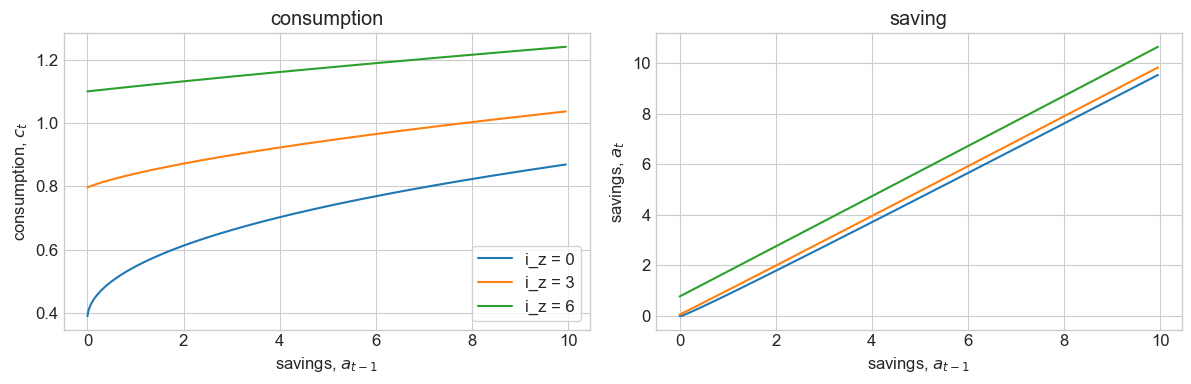

In [7]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 10

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

fig.tight_layout()

In [8]:
np.sum(ss.a*ss.D)

6.030382738600878

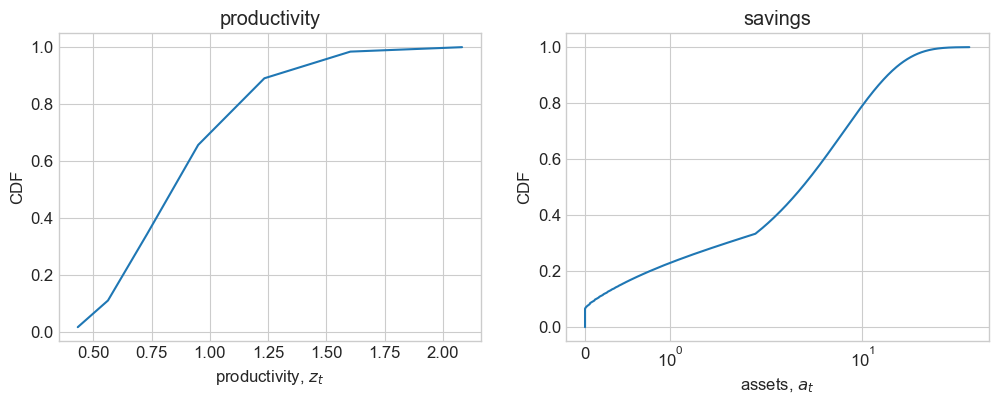

In [9]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

# Test household path

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.7 secs
household problem simulated along transition in 0.3 secs



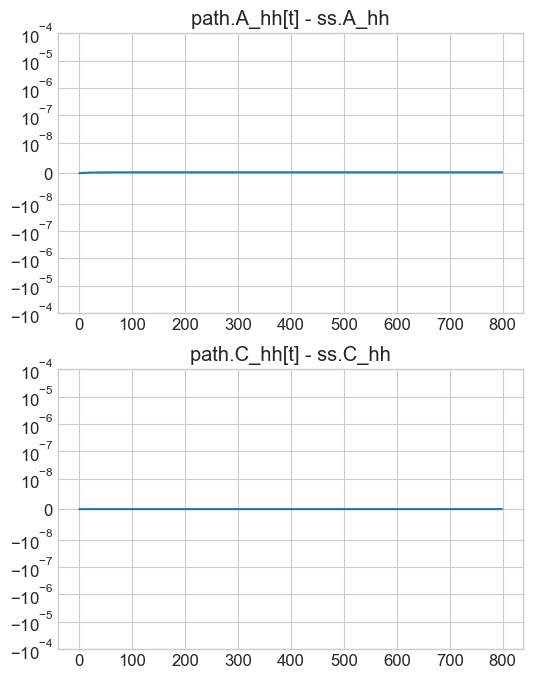

In [15]:
model.test_hh_path()

# Test steady state

In [16]:
from steady_state import obj_ss

In [17]:
beta_vec = np.linspace(0.96**(1/4),0.96**(1/4),1)
clearing_A_vec = np.zeros(beta_vec.size)
for i,beta in enumerate(beta_vec):
    clearing_A_vec[i] = obj_ss(beta,model,do_print=False)
    print(f'{beta = :.2f} = {clearing_A_vec[i] = :.2f}')

0.999999999999992
beta = 0.99 = clearing_A_vec[i] = -0.35


In [18]:
ss.tau

0.20496293157320383

In [29]:
model.find_ss(do_print=True)

0.9999999999999964
0.9999999999999125
0.9999999999999963
0.9999999999999915
0.9999999999999932
0.9999999999999925
0.9999999999999911
0.9999999999999911
0.9999999999999922
0.9999999999999927
0.9999999999999922
steady state found in 13.6 secs
 r    =   0.0050
 q    =   4.8789
 qB   =   1.0000
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [43]:
par.beta

0.9766698474230906

# Test path

In [30]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
B              : t0 =  0.0e+00, max abs.  2.6e-04
chi            : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -2.2e-02, max abs.  3.9e-01
clearing_Y     : t0 = -1.7e-02, max abs.  1.7e-02
G              : t0 =  0.0e+00, max abs.  0.0e+00
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
pi_w           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
q              : t0 =  0.0e+00, max abs.  3.0e-02
r              : t0 =  0.0e+00, max abs.  0.0e+00
ra             : t0 = -5.0e-03, max abs.  5.0e-03
tau            : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0 = -2.2e-02, max abs.  3.9e-01
C_hh           : t0

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 50 100 150 [computed in 1.6 secs]
finding Jacobian wrt. L              : 50 100 150 [computed in 1.7 secs]
finding Jacobian wrt. chi            : 50 100 150 [computed in 1.5 secs]
finding Jacobian wrt. ra             : 50 100 150 [computed in 1.5 secs]
finding Jacobian wrt. tau            : 50 100 150 [computed in 1.5 secs]
finding Jacobian wrt. w              : 50 100 150 [computed in 1.4 secs]
household Jacobian computed in 9.6 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for L               in 0.7 secs
curly_Y and curly_D calculated for chi             in 0.7 secs
curly_Y and curly_D calculated for ra              in 0.7 secs
curly_Y and curly_D calculated for tau             in 0.7 secs
curly_Y and curly_D calculated for w               in 0.7 secs
curly_E calculated in 0.6 secs
builiding blocks combine

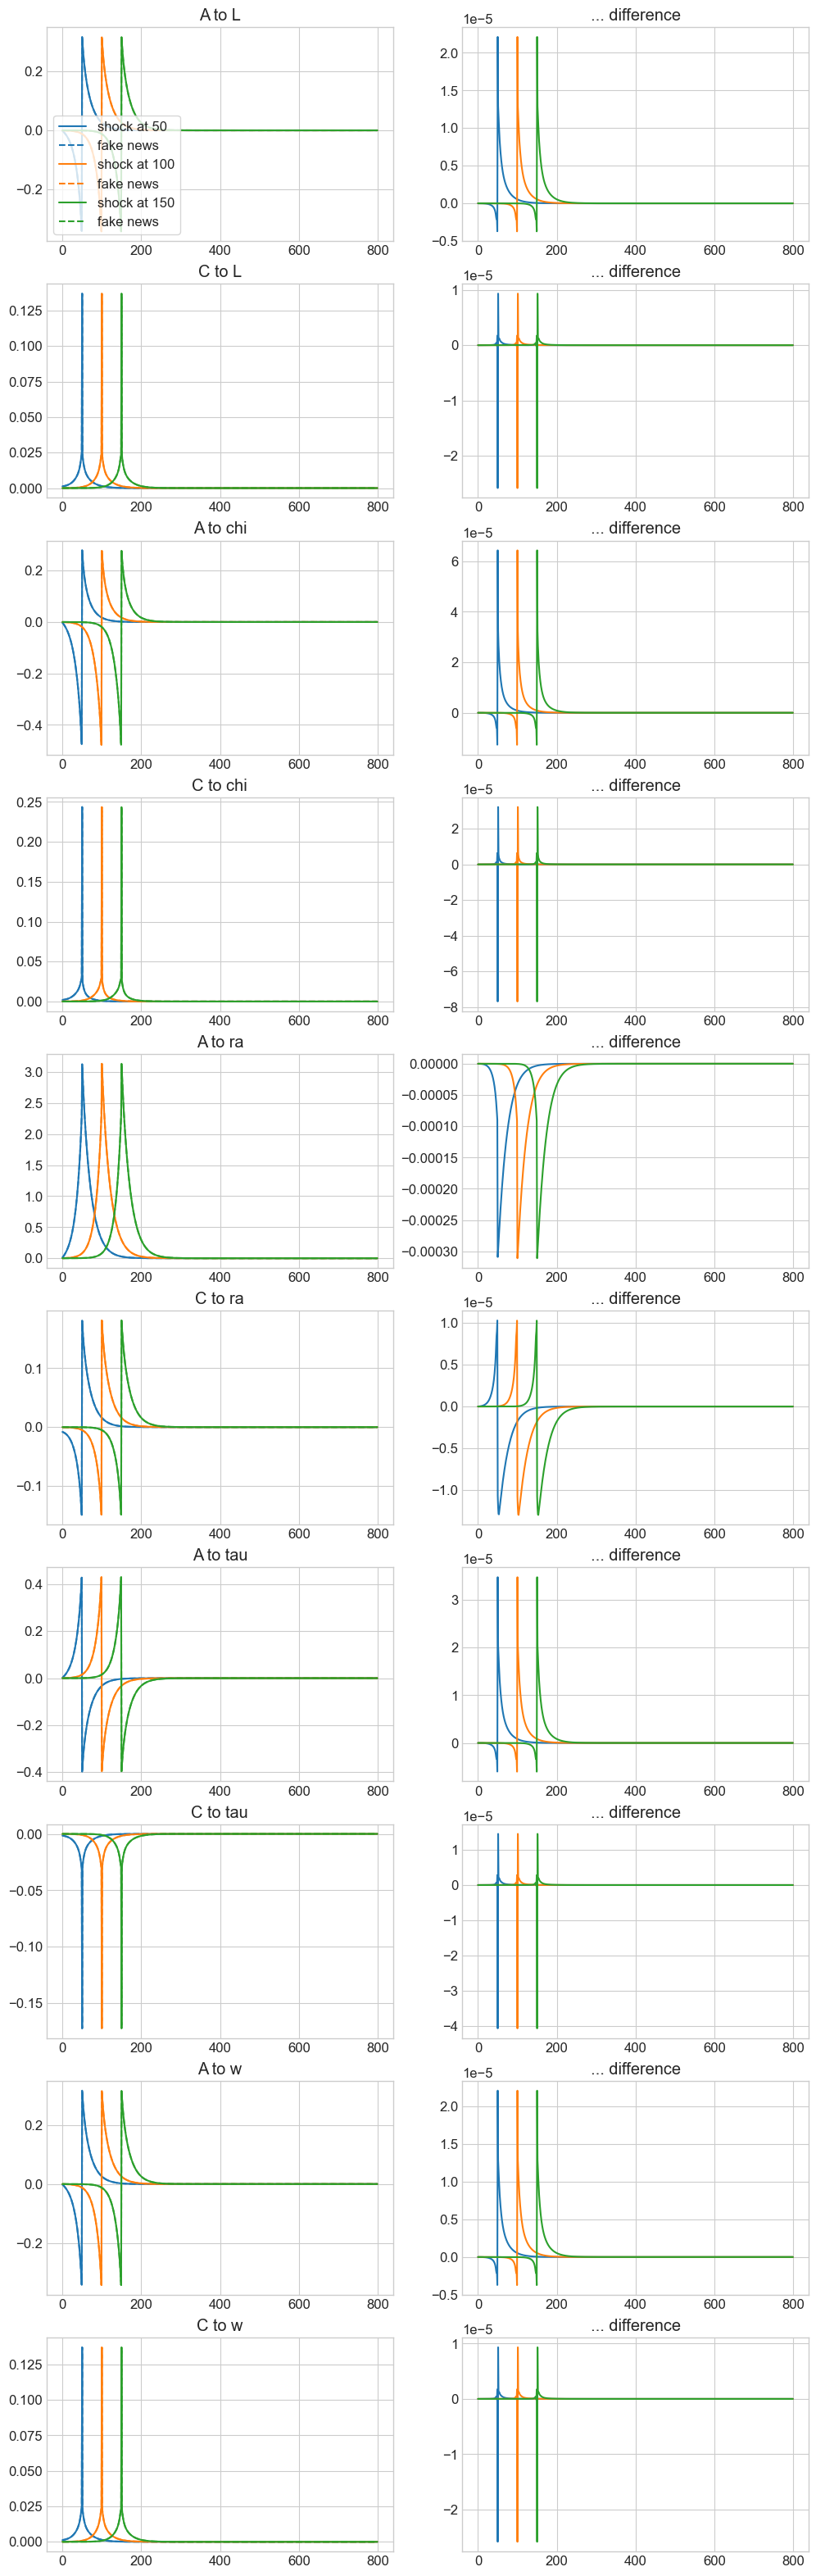

In [69]:
model.test_jacs(s_list=[50,100,150])

# Question 1

In [24]:
model.find_ss()

0.9999999999999964
0.9999999999999125
0.9999999999999963
0.9999999999999915
0.9999999999999932
0.9999999999999925
0.9999999999999911
0.9999999999999911
0.9999999999999922
0.9999999999999927
0.9999999999999922


# Question 2

In [43]:
model.compute_jacs()
#model.find_transition_path()

In [44]:
model.find_transition_path(do_print = True)

finding the transition path:
 it =   0 -> max. abs. error = 2.97e-02
   3.30e-04 in NKWC_res
   2.97e-02 in clearing_A
   8.73e-03 in clearing_Y


LinAlgError: Last 2 dimensions of the array must be square

# Question 3

# Question 4